Gradient Boost Example

https://colab.research.google.com/drive/1tRzL1GGOJDgz7CHSY1HECd4IwNAjuip5?usp=sharing#scrollTo=iW61uPErR45z

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [2]:
# SPLITTING THE DATASET
target_path = '/kaggle/input/abalone/train.csv'
submission_path = '/kaggle/input/abalone/test.csv'

target = pd.read_csv(target_path)
submission = pd.read_csv(submission_path)

In [3]:
# One-hot encode 'Sex'
target = pd.get_dummies(target, columns=['Sex'], drop_first=True)
submission = pd.get_dummies(submission, columns=['Sex'], drop_first=True)

In [4]:
x = target.drop('Rings', axis = 1)
y = target['Rings']

In [5]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
y_train

38059     9
26114     8
19998     9
18162    10
56716    11
         ..
21243     4
45891     6
42613    10
43567     8
68268     9
Name: Rings, Length: 72492, dtype: int64

In [7]:
model = RandomForestClassifier(50, max_depth=15, max_features=15)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.35838437344810464


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got

In [9]:
model2 = XGBClassifier(objective='multiclass:softmax', learning_rate = 0.1,
              max_depth = 15, n_estimators = 50)
model2.fit(x_train, y_train)
preds = model2.predict(x_test)
print(sum(preds==y_test)/len(y_test))

0.17326049771009214


<Axes: >

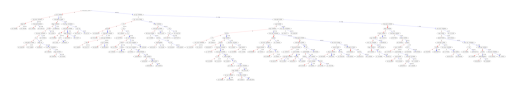

In [10]:
plot_tree(model2, num_trees=3)

In [11]:
from sklearn.metrics import mean_squared_log_error

def root_mean_squared_log_error(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [12]:
def identify_negatives(predictions):
    n = [num for num in predictions if num < 0]
    print(n)

In [13]:
def ceil_predictions(predictions):
    return [0.0001 if num < 0 else num for num in predictions]

In [14]:
from sklearn.metrics import r2_score

def evaluate_model(true, predicted):
    # mae = mean_absolute_error(true, predicted)
    # mse = mean_squared_error(true, predicted)
    # rmse = np.sqrt(mean_squared_error(true, predicted))
    predicted = ceil_predictions(predicted)
    r2_square = r2_score(true, predicted)
    rmsle = root_mean_squared_log_error(true, predicted)
    return r2_square,rmsle 

Not great results for this method off hand

In [15]:
model2pred=model2.predict(x_test)
evaluate_model(y_test, model2pred)


(0.3277826554741011, 0.23006830999350258)